<a href="https://colab.research.google.com/github/lucianosilva-github/supercomp/blob/master/MPI-AULA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MESSAGE PASSING INTERFACE (AULA 1)**

### **FUNDAMENTOS DE MPI**

**Message Passing Interface (MPI)** é um padrão para comunicação de dados em computação paralela. Existem várias modalidades de computação paralela, e dependendo do problema que se está tentando resolver, pode ser necessário passar informações entre os vários processadores ou nodos de um cluster, e o MPI oferece uma infraestrutura para essa tarefa.

No padrão MPI, uma aplicação é constituída por uma ou mais tarefas (as quais podem ser processos, ou threads, dependendo da implementação) que se comunicam, acionando-se funções para o envio e recebimento de mensagens entre os processos. 

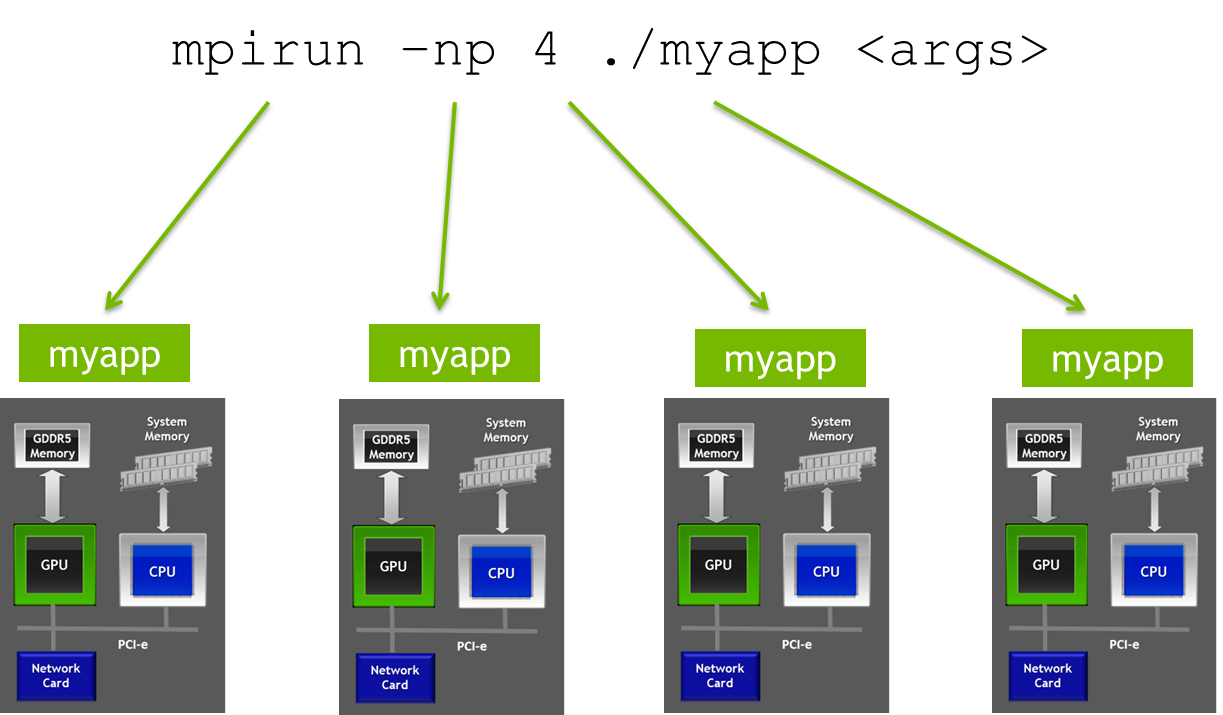

Inicialmente, na maioria das implementações, um conjunto fixo de processos é criado. Porém, esses processos podem executar diferentes programas. Por isso, o padrão MPI é algumas vezes referido como MPMD (multiple program multiple data). Elementos importantes em implementações paralelas são a comunicação de dados entre processos paralelos e o balanceamento da carga. Dado o fato do número de processos no MPI ser normalmente fixo, neste texto é enfocado o mecanismo usado para comunicação de dados entre processos. Os processos podem usar mecanismos de comunicação ponto a ponto (operações para enviar mensagens de um determinado processo a outro). 

Um grupo de processos pode invocar operações coletivas (collective) de comunicação para executar operações globais. O MPI é capaz de suportar comunicação assíncrona e programação modular, através de mecanismos de comunicadores (communicator) que permitem ao usuário MPI definir módulos que encapsulem estruturas de comunicação interna.

### **CLUSTERS MPI**

**Cluster** é um termo em inglês que significa "aglomerado" ou "agregado" e pode ser aplicado em vários contextos. No caso de Supercomputação, o termo define uma arquitetura de sistema capaz combinar vários computadores para trabalharem em conjunto ou pode denominar o grupo em si de computadores combinados.

Cada estação é denominada “nodo” e, combinadas, formam o cluster. Em alguns casos, é possível ver referências como “supercomputadores” ou “computação em cluster” para o mesmo cenário, representando o hardware usado ou o software especialmente desenvolvido para conseguir combinar esses equipamentos.

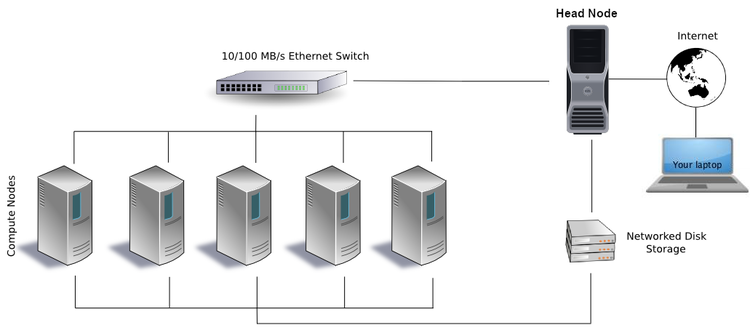

Os nodos são responsáveis pelas tarefas em execução. Seja o tráfego de requisições entrante ou requisições de recursos (mais memória para armazenamento de dados, por exemplo) são distribuídos para as máquinas que compõem o sistema. É literalmente um “todos por um”. Desde a mais simples até a mais complexa tarefa demandada é realizada com a força resultante da união dos recursos disponíveis. Neste modelo, a performance é priorizada e, caso alguma das estações falhe, ela é retirada do sistema e a tarefa é redistribuída entre as restantes.

Para construir os nossos clusters MPI, vamos usar o ambiente de simulação SIMGRID (http://www.simgrid.org). Ele permite especificar a arquitetura de um cluster (nodos e links) e simular a execução de aplicações distribuídas (MPI, por exemplo) sob este cluster.

Para definir a arquitetura de um cluster, usamos um arquivo XML. Por exemplo:

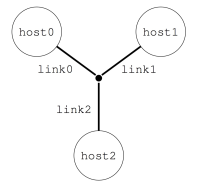

In [ ]:
%%writefile cluster.xml

<?xml version='1.0'?>
<!DOCTYPE platform SYSTEM "https://simgrid.org/simgrid.dtd">
<platform version="4.1">
  <zone id="AS0" routing="Full">
    <host id="host0" speed="1Gf"/>
    <host id="host1" speed="2Gf"/>
    <host id="host2" speed="40Gf"/>
    <link id="link0" bandwidth="125MBps" latency="100us"/>
    <link id="link1" bandwidth="50MBps" latency="150us"/>
    <link id="link2" bandwidth="250MBps" latency="50us"/>
    <route src="host0" dst="host1"><link_ctn id="link0"/><link_ctn id="link1"/></route>
    <route src="host1" dst="host2"><link_ctn id="link1"/><link_ctn id="link2"/></route>
    <route src="host0" dst="host2"><link_ctn id="link0"/><link_ctn id="link2"/></route>
  </zone>
</platform>

Os elementos básicos (com \<host> e \<link>) são descritos primeiro e, em seguida, as rotas entre qualquer par de hosts são fornecidas explicitamente com \<route>. Qualquer host deve receber uma velocidade computacional em flops, enquanto os links devem receber uma latência e uma largura de banda. Você pode escrever 1Gf para 1.000.000.000 flops.

As rotas definidas com <route> são simétricas por padrão, o que significa que a lista de links percorridos de A a B é a mesma de B a A. Defina explicitamente rotas não simétricas, se preferir.